In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

In [3]:
with open('/content/drive/MyDrive/MyProject/dataset/final_dataset.pickle', 'rb') as file:
    df = pickle.load(file)

df.head(2)

,userid,age,gender,tenure,friends,request,g_likes,r_likes
0,2094382,14,male,266.0,0,0,0,0
1,1192601,14,female,6.0,0,0,0,0


<hr>

In this section, I’m going to see whether there is relationship between variables with tenure. Since tenure is very crucial for each social media and the companies want to have more loyal users, it makes sense that we see how many other factors are correlated to tenure. For doing this, we should consider two different ways. One way is correlation between numeric variables with tenure, and the second way is correlation between categorical variables with tenure. For the first one, we use Pearson correlation and for the second one, we use ANOVA test.

## 1 - Pearson Correlation

First, based on OLS method, we analyze the correlation and regression between two variables on plot.

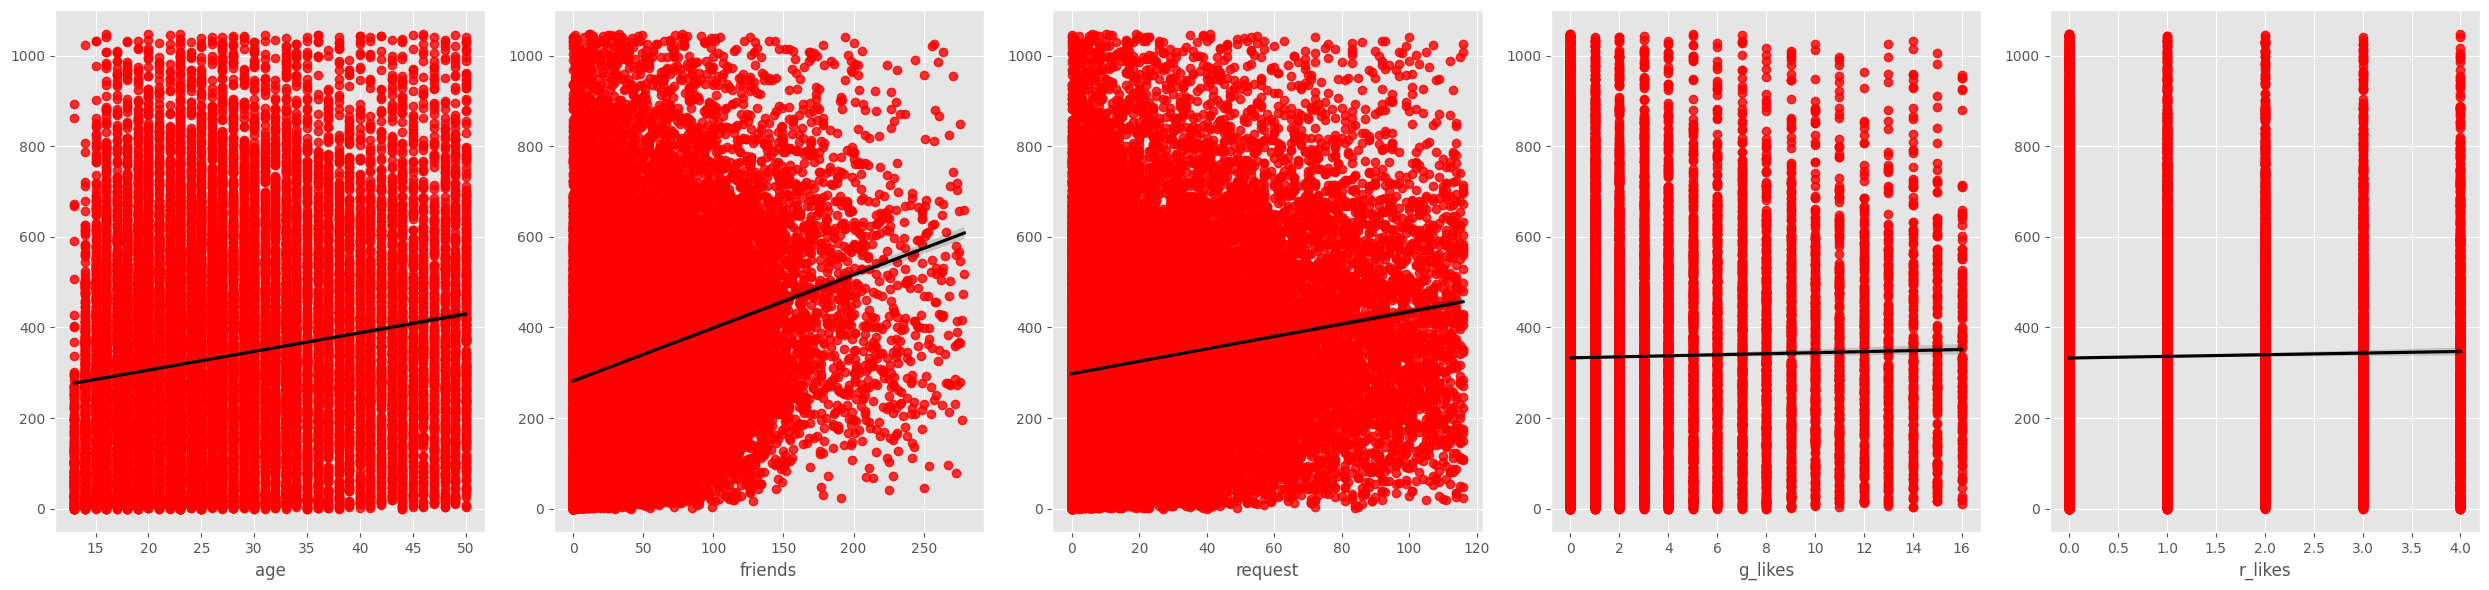

In [7]:
#declare numeric variable
numeric = ['age','friends','request','g_likes', 'r_likes']

# Create a grid of subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 6))

# Flatten the axes array to make it 1D
axes = axes.ravel()

# Loop through each subplot and plot sns.regplot
for i, col in enumerate(numeric):
    sns.regplot(x=col, y=df['tenure'], data=df, ax=axes[i], scatter_kws={"color": "red"}, line_kws={"color":"black"})
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The scatter plots show:
* When users age, you have more tenure.
*	When users have more friends, they prefer to stay on the Facebook
*	When users send more friendship requests, they have more tenure.
*	However, there is no relationship between giving more like or receiving like to other people and more or less tenure.


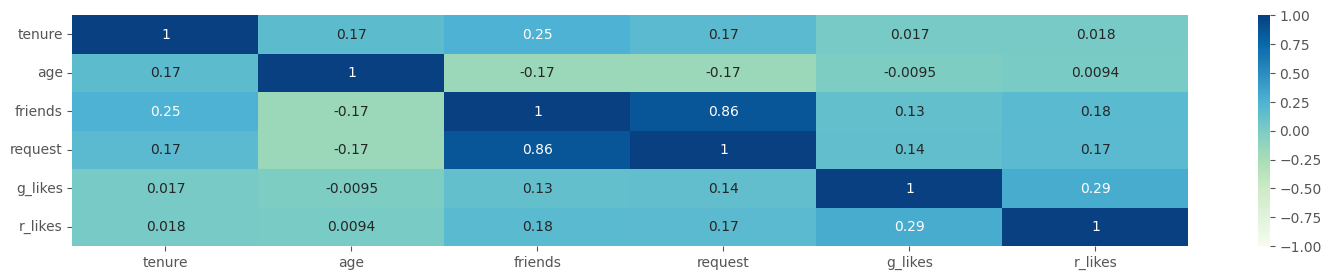

In [8]:
pearson_cor = df[['tenure' , 'age','friends','request','g_likes', 'r_likes']].corr(method = 'pearson')

plt.figure(figsize = (18,3))

sns.heatmap(pearson_cor,
            vmin = -1,
            vmax = 1,
            cmap = "GnBu",
            annot = True)
plt.show()

<hr>

## 2 - ANOVA Test

For categorical variables, first we should see whether a particular categorical variable impacts tenure or not (it is significant or not). For doing this, we run ANOVA test to compare the meaningful difference between means. After that, for the variables that are significant, we run pairwise descriptive analysis for all labels in the particular categorical variable and then compare their impacts on the tenure.

In [9]:
cat_list = ['gender']

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in cat_list:
    formula = 'tenure ~ {}'.format(i)
    model = ols(formula, data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    p_value = anova.iloc[0,3]

    print('P-value ~ {}: {}'.format(i , p_value))

P-value ~ gender: 0.000868011156315235


According to results, we can come up that gender is significant to explain the tenure, because the p-value is less than 0.05 and we reject null hypothesis. So, in the next step, we want to see for each label in the above categorical variables, which of them has the most impact on tenure. 

In [12]:
def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['tenure'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by = mean_by.sort_values(by=['tenure'], inplace=False, ascending=False)
    
    return mean_by

In [13]:
mean_pairwise('gender')

,tenure
gender,
female,343.317820
male,332.401851


Being female would cause to have more tenure.